In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import os

# Path dataset
data_dir = 'dataset_sungai'

# Preprocessing dengan augmentasi data dan validasi split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

# Generator training dan validasi
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Arsitektur CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)

# Simpan model
model.save("model_deteksi_sungai.h5")
print("✅ Model berhasil disimpan sebagai 'model_deteksi_sungai.h5'")


Found 50 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


d:\Semester 8\Computer Vision\deteksi-sungai\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Semester 8\Computer Vision\deteksi-sungai\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5469 - loss: 1.5826  

d:\Semester 8\Computer Vision\deteksi-sungai\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 25s 9s/step - accuracy: 0.5312 - loss: 1.8848 - val_accuracy: 0.5000 - val_loss: 2.4268
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 8s/step - accuracy: 0.5238 - loss: 2.0356 - val_accuracy: 0.5000 - val_loss: 0.8113
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.5029 - loss: 0.8103 - val_accuracy: 0.5000 - val_loss: 0.6895
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 14s/step - accuracy: 0.5504 - loss: 0.6872 - val_accuracy: 0.5000 - val_loss: 0.6860
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 7s/step - accuracy: 0.5342 - loss: 0.6745 - val_accuracy: 0.5833 - val_loss: 0.6567
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 9s/step - accuracy: 0.7033 - loss: 0.6494 - val_accuracy: 0.6667 - val_loss: 0.6236
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 7s/step - accuracy: 0.7004 - loss: 0.6298 - val_accuracy: 0.5833 - val_loss: 0.5933
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.6321 - loss: 0.5973 - val_accuracy: 0.5833 - val_loss: 0.5704
Epoch 9/20
2/2 ━━━

✅ Model berhasil disimpan sebagai 'model_deteksi_sungai.h5'


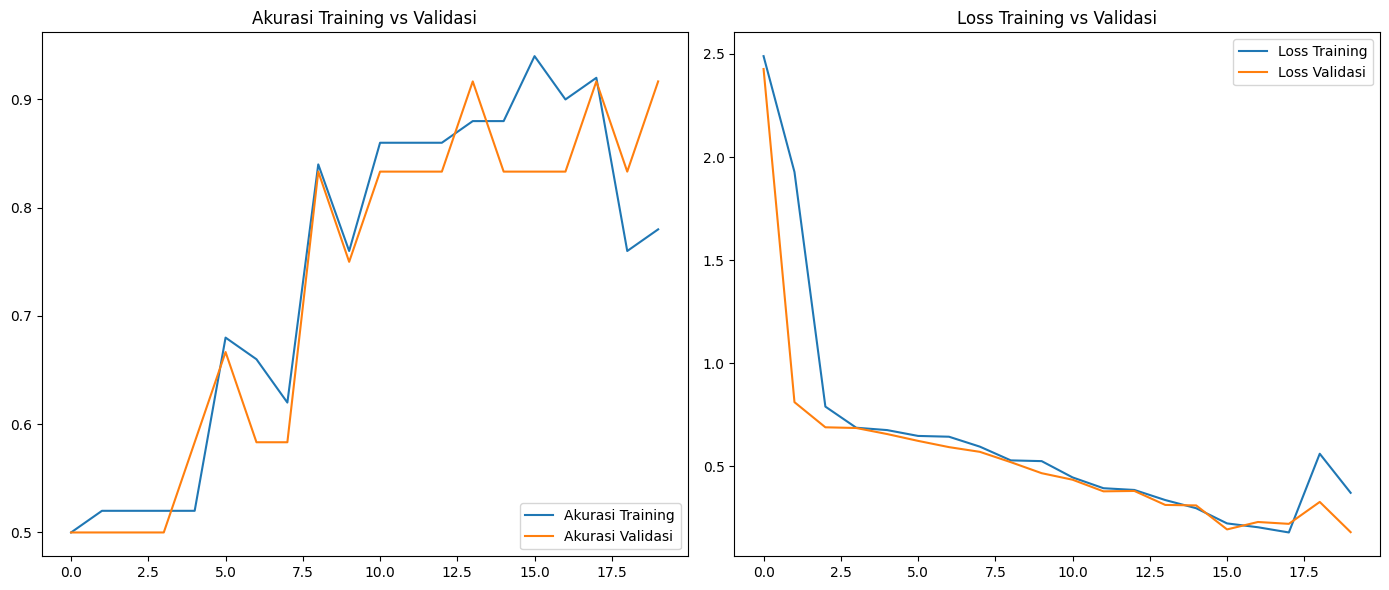

In [3]:
# Plot Akurasi & Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Akurasi Training')
plt.plot(epochs_range, val_acc, label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Akurasi Training vs Validasi')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss Training')
plt.plot(epochs_range, val_loss, label='Loss Validasi')
plt.legend(loc='upper right')
plt.title('Loss Training vs Validasi')

plt.tight_layout()
plt.show()
